Hello,

I have some questions for you that I need to be answered before the board meeting Morning morning. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed? 
8. Anything else I should be aware of?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import env
import acquire
import matplotlib.dates as mdates
import math
from sklearn import metrics
from random import randint
from matplotlib import style
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = acquire.get_curriculum_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 103.0+ MB


In [4]:
df = df.drop(columns='deleted_at')

In [7]:
df = df.dropna()

In [8]:
df.describe()

,user_id,cohort_id,id,program_id
count,847329.000000,847329.000000,847329.000000,847329.000000
mean,456.707192,48.501042,48.501042,2.086003
std,250.734309,32.795501,32.795501,0.388230
min,1.000000,1.000000,1.000000,1.000000
25%,263.000000,28.000000,28.000000,2.000000
50%,476.000000,33.000000,33.000000,2.000000
75%,648.000000,57.000000,57.000000,2.000000
max,981.000000,139.000000,139.000000,4.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847329 entries, 0 to 900222
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        847329 non-null  object 
 1   time        847329 non-null  object 
 2   path        847329 non-null  object 
 3   user_id     847329 non-null  int64  
 4   cohort_id   847329 non-null  float64
 5   ip          847329 non-null  object 
 6   id          847329 non-null  float64
 7   name        847329 non-null  object 
 8   slack       847329 non-null  object 
 9   start_date  847329 non-null  object 
 10  end_date    847329 non-null  object 
 11  created_at  847329 non-null  object 
 12  updated_at  847329 non-null  object 
 13  program_id  847329 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 97.0+ MB


In [10]:
df.path.nunique()

2224

In [11]:
df.path.value_counts(dropna=False).sort_values(ascending=True)

appendix/professional-development/post-interview-review-form        1
html-css/elecments                                                  1
html                                                                1
htmle-css/elements                                                  1
5-stats/1-descriptive-stats                                         1
                                                                ...  
java-iii                                                        13166
search/search_index.json                                        17534
toc                                                             17591
javascript-i                                                    18203
/                                                               45854
Name: path, Length: 2224, dtype: int64

In [12]:
df.cohort_id.value_counts()

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21581
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [13]:
df.cohort_id.nunique()

47

In [14]:
df.cohort_id = df.cohort_id.astype(int)

In [16]:
df.date = pd.to_datetime(df.date)

In [17]:
df = df.set_index(df.date).sort_index()

<AxesSubplot:xlabel='date'>

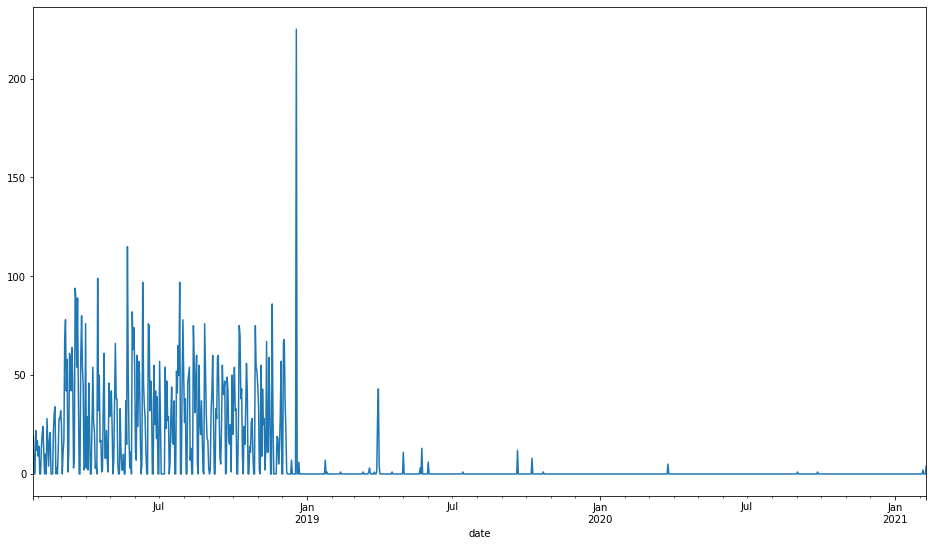

In [18]:
df[df.cohort_id==1].path.resample('d').count().plot(figsize=[16,9])

In [19]:
df.groupby(['user_id','ip']).path.resample('m').count().idxmax()

(570, '172.124.67.93', Timestamp('2020-04-30 00:00:00'))

In [20]:
df.groupby('user_id').path.count().sort_values()

user_id
652        1
649        1
952        1
165        1
879        1
       ...  
1       7404
314     7783
53     12329
64     16322
11     17913
Name: path, Length: 911, dtype: int64

In [21]:
user_path_count = df.groupby('user_id').path.count()

In [22]:
# Calculate the z-score 
zscores = pd.Series((user_path_count - user_path_count.mean()) / user_path_count.std())

# Finds all of the observations three standard deviations or more
user_path_count[zscores.abs() >= 3]

user_id
1       7404
11     17913
53     12329
64     16322
248     5075
314     7783
344     5460
428     5897
495     6451
581     6434
Name: path, dtype: int64